# LOGISTIC REGRESSION

$sign(w^T\phi(x))$ will be replaced with $g(w^T\phi(x))$

$g(w^T\phi(x)) = \Large\frac{1}{1+e^{-w^T\phi(x)}} \normalsize \in [0,1]$ can be interpreted as $Pr(y=1|x)$

Now $Pr(y=0|x)=1-Pr(y=1|x)$

<b>Sigmoid Function</b>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/600px-Logistic-curve.svg.png">

<b> Maximum Liklihood Estimate </b> $w^*$ maximizes the Liklihood $L(D;w)$

Likilihood is the probability of D under iid assumption $w^*=argmax_w L(D;w)$

$L(D;w) = \prod_{i=1}^{m} Pr(y_i|x_i;w)$

$\prod_{i=1}^{m} Pr(y_i|x_i;w) = \prod_{i=1}^{m} Pr(1 |x_i,w)^{y_i}Pr(0|x_i,w)^{1-y_i}=\prod_{i=1}^{m}(f(x_i))^{y_i}(1-f(x_i))^{1-y_i}$<br>
<hr>
Where $f(x_i)$ is the decision function <br>
Maximizing the Liklihood is same as minimizing the negetive of Log liklihood <br>
$E(w)=-\frac{1}{m}log(Pr(D;w))$ <br>

<i><b>$E(w)$</b> is called the cross entropy loss function.<br>
$f_w(x_i)=\Large\frac{1}{1+e^{-w^T\phi(x)}}$<br></i>

<hr>

<b>Gradient Descent for LR</b><br>

$-\eta\nabla E(w)=\eta[\frac{1}{m}\sum_{i}^{m}(y_i-f_w(x_i))\phi(x_i)]$

<b>The Iterative Rule</b><br>

$w^{(k+1)}=w^k+\eta\nabla E(w)=\eta[\frac{1}{m}\sum_{i}^{m}(y_i-f_w(x_i))\phi(x_i)]$


<b>Stochastic Version</b><br>

$w^{(k+1)}=w^k+\eta\nabla E(w)=w^k + \eta(y_i-f_w(x_i))\phi(x_i)$

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

data=pd.read_csv('dataset/data.csv')
data.head()

X=data[['x','y']]
def zero_one(x):
    if x==1:
        return 1
    else:
        return 0
Y=data['label'].apply(zero_one)

Populating the interactive namespace from numpy and matplotlib


In [67]:
class logistic_regression():
    def __init__(self,mode='batch',lr=0.01,max_step=12):
        self._mode=mode
        self._lr=lr
        self._max_step=max_step
        self._phi=None
        self._w=None
        self._y=None
    
    #augment phi
    def augment(self,x):
        x=np.hstack((x,np.ones(len(x)).reshape((len(x),1))))
        return x
    
    #sigmoid fns
    def sigmoid_fns(self,x):
        return 1./(1.+np.exp(-np.dot(self._w.T,x)))
    
    #fit
    def fit(self,X,Y):
        self._phi=self.augment(X.as_matrix())
        self._y=Y
        self._w=np.ones(self._phi.shape[1])
        self.sgd()
    
    #stochastic gradient descent
    def sgd(self):
        for i in range(self._max_step):
            for j in range(len(self._phi)):
                self._w+=self._lr*(self._y[j]-self.sigmoid_fns(self._phi[j]))*self._phi[j]
        print("<<DONE TRAINING>>")
        
    #predict
    def predict(self,x):
        x=self.augment(x.as_matrix())
        res=np.dot(x,self._w)
        res=np.exp(-res)
        res=(1./(1.+res))
        def label(x):
            if x>=0.5:
                return 1
            else:
                return 0
        f=np.vectorize(label)
        return f(res)
    
    #boundary function in 2D
    def boundary2D(self,x):
        c=-self._w[2]/self._w[1]
        m=-self._w[0]/self._w[1]
        return m*x+c
        
    #plot decision boundary in 2D
    def plot(self):
        x=np.linspace(0,10)
        plt.scatter(self._phi[:,0],self._phi[:,1],c=self._y)
        plt.plot(x,self.boundary2D(x))
        plt.xlim(0,10)
        plt.ylim(0,10)
        plt.show()
        
        

<<DONE TRAINING>>


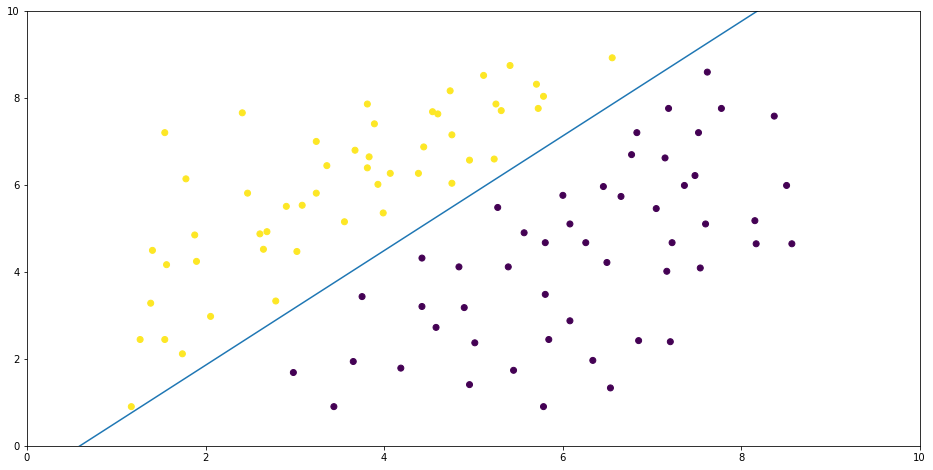

In [68]:
p=logistic_regression(max_step=20,lr=0.8)
#Fit model with Data
p.fit(X,Y)
#plot decison boundary
p.plot()



## Logistic Regression Fit

<img src="imgs/logistic_regression_fit.gif">